In [ ]:
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def inceptionv3(input_shape, num_classes):
    base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze the base model
    base_model.trainable = False

    # Create the model
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Example usage
input_shape = (299, 299, 3)  # Input shape of images (including channels)
num_classes = 3  # Number of output classes

# Define the directory containing the data
data_directory = '/content/drive/MyDrive/Assignment/val'

# Use the image_dataset_from_directory function to load the data
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    labels="inferred",
    label_mode="categorical",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(299, 299),
    batch_size=32,
    class_names=['Glioma', 'Meningioma', 'Pituitary tumor']  # Specify the class names
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    labels="inferred",
    label_mode="categorical",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(299, 299),
    batch_size=32,
    class_names=['Glioma', 'Meningioma', 'Pituitary tumor']  # Specify the class names
)

# Configure the dataset for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Build the model
model = inceptionv3(input_shape, num_classes)
model.summary()


Found 828 files belonging to 3 classes.
Using 663 files for training.
Found 828 files belonging to 3 classes.
Using 165 files for validation.
87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4096)              8392704   
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
21/21 [==============================] - 285s 12s/step - loss: 59.9507 - accuracy: 0.3997 - val_loss: 0.8198 - val_accuracy: 0.6303
Epoch 2/10
21/21 [==============================] - 204s 10s/step - loss: 1.1048 - accuracy: 0.5535 - val_loss: 0.7941 - val_accuracy: 0.6909
Epoch 3/10
21/21 [==============================] - 200s 10s/step - loss: 0.8327 - accuracy: 0.5928 - val_loss: 0.7783 - val_accuracy: 0.6667
Epoch 4/10
21/21 [==============================] - 199s 10s/step - loss: 0.8062 - accuracy: 0.6440 - val_loss: 0.7342 - val_accuracy: 0.6848
Epoch 5/10
21/21 [==============================] - 196s 9s/step - loss: 0.7730 - accuracy: 0.6229 - val_loss: 0.7686 - val_accuracy: 0.7273
Epoch 6/10
21/21 [==============================] - 198s 9s/step - loss: 0.7929 - accuracy: 0.6395 - val_loss: 0.8657 - val_accuracy: 0.7212
Epoch 7/10
21/21 [==============================] - 202s 10s/step - loss: 0.8538 - accuracy: 0.6229 - val_loss: 0.7874 - val_accuracy: 0.6545
Epoch 8

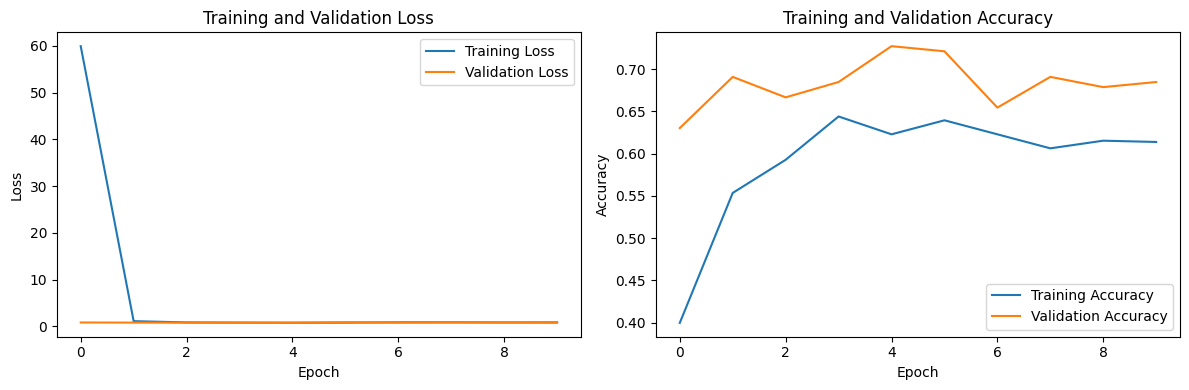

In [ ]:
class PlotTrainingProgress(tf.keras.callbacks.Callback):
    def on_train_end(self, logs=None):
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        axes[0].plot(self.model.history.history['loss'], label='Training Loss')
        axes[0].plot(self.model.history.history['val_loss'], label='Validation Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].set_title('Training and Validation Loss')
        axes[0].legend()

        axes[1].plot(self.model.history.history['accuracy'], label='Training Accuracy')
        axes[1].plot(self.model.history.history['val_accuracy'], label='Validation Accuracy')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy')
        axes[1].set_title('Training and Validation Accuracy')
        axes[1].legend()

        plt.tight_layout()
        plt.show()  # Show the final figure

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    callbacks=[PlotTrainingProgress()]
)

model.save('/content/drive/MyDrive/Assignment/inception_model')